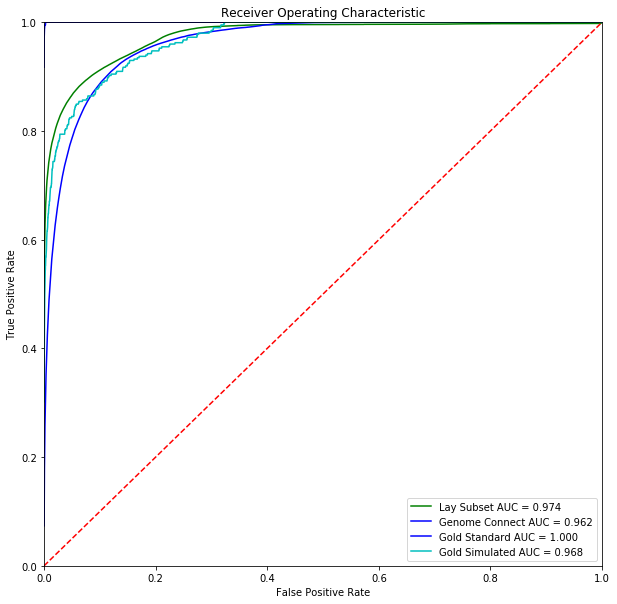

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from typing import Tuple, List


def get_tpr_fpr(file) -> Tuple[List[int], List[int]]:
    fpr = []
    tpr = []
    with open(file, 'r') as confusion_matrix:
        for line in confusion_matrix:
            rank, true_pos, false_pos, false_neg, true_neg = line.rstrip("\n").split("\t")

            fpr.append( int(false_pos) / (int(false_pos) + int(true_neg)) )
            tpr.append( int(true_pos) / (int(true_pos) + int(false_neg)) )
            
    return fpr, tpr
    

lay_fpr, lay_tpr = get_tpr_fpr('../data/confusion_matrices/rank/lay-confusion.tsv')
gold_fpr, gold_tpr = get_tpr_fpr('../data/confusion_matrices/rank/gold-confusion.tsv')
gc_fpr, gc_tpr = get_tpr_fpr('../data/confusion_matrices/rank/gc-confusion.tsv')
#sim_fpr, sim_tpr = get_tpr_fpr('../data/confusion_matrices/rank/simulated-confusion.tsv')
sim_fpr, sim_tpr = get_tpr_fpr('../scripts/lay-confusion.tsv')


gc_auc = auc(gc_fpr, gc_tpr)
lay_auc = auc(lay_fpr, lay_tpr)
gold_auc = auc(gold_fpr, gold_tpr)
sim_auc = auc(sim_fpr, sim_tpr)


plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(lay_fpr, lay_tpr, 'g', label = 'Lay Subset AUC = %0.3f' % lay_auc)
plt.plot(gc_fpr, gc_tpr, 'b', label = 'Genome Connect AUC = %0.3f' % gc_auc)
plt.plot(gold_fpr, gold_tpr, 'b', label = 'Gold Standard AUC = %0.3f' % gold_auc)
plt.plot(sim_fpr, sim_tpr, 'c', label = 'Gold Simulated AUC = %0.3f' % sim_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()